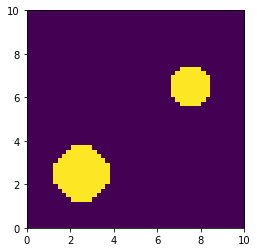

In [1]:
import matplotlib.pyplot as plt
import numpy as np

N = 50
xbound = np.linspace(0, 10, N + 1)
ybound = np.linspace(0, 10, N + 1)
x = (xbound[:-1] + xbound[1:]) / 2
y = (ybound[:-1] + ybound[1:]) / 2

X, Y = np.meshgrid(x, y)
Z = np.exp(-((X - 2.5)**2 + (Y - 2.5)**2)) + np.exp(-2 * ((X - 7.5)**2 + (Y - 6.5)**2))
mask = Z > 0.2

plt.imshow(mask, origin='lower', extent=(0, 10, 0, 10))

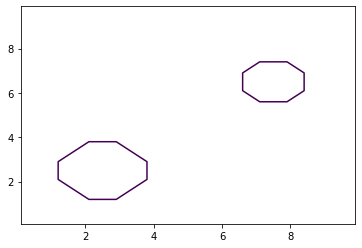

In [2]:
plt.contour(x, y, mask, levels=[0.5])

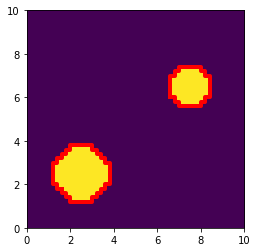

In [3]:
import shapely.geometry
import shapely.ops

geoms = []
for yidx, xidx in zip(*np.where(mask)):
    geoms.append(shapely.geometry.box(xbound[xidx], ybound[yidx], xbound[xidx+1], ybound[yidx+1]))
full_geom = shapely.ops.unary_union(geoms)

for geom in full_geom.geoms:
    plt.plot(*geom.exterior.xy, linewidth=4, color='r')
plt.imshow(mask, origin='lower', extent=(0, 10, 0, 10))

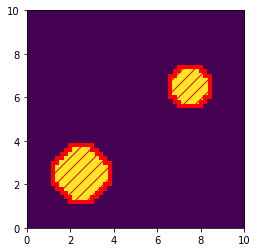

In [4]:
from matplotlib.patches import Polygon

polygons = []
for geom in full_geom.geoms:
    p = Polygon(list(zip(*geom.exterior.xy)), closed=True, facecolor='none', edgecolor='r', linestyle='-', hatch='//', linewidth=4)
    polygons.append(p)

plt.figure()
axes = plt.gca()
for p in polygons:
    axes.add_patch(p)
plt.imshow(mask, origin='lower', extent=(0, 10, 0, 10))

(0.0, 10.0)

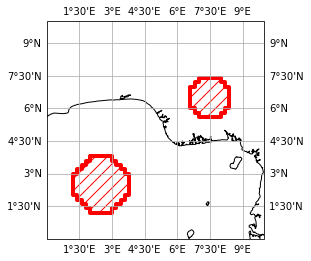

In [5]:
import cartopy.crs as ccrs

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_geometries(
    full_geom.geoms,
    crs=ccrs.PlateCarree(),
    facecolor='white',
    edgecolor='red',
    linewidth=4,
    hatch='//',
)
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))